# Star Wars Survey

 While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their GitHub repository.

The Star Wars Franchise had 6 movies split into 2 trilogies. The original star wars trilogy released in the late 1970's began at Episode 4 and ended with Episode 6. Starting in 1999 the prequel trilogy began its release including Episodes 1 through 3. 

Star Wars: Episode I  The Phantom Menace released in 1999

Star Wars: Episode II  Attack of the Clones released in 2002

Star Wars: Episode III  Revenge of the Sith released in 2005

Star Wars: Episode IV  A New Hope released in 1977

Star Wars: Episode V The Empire Strikes Back released in 1980

Star Wars: Episode VI Return of the Jedi released in 1983

### Exploring the Star Wars dataframe:

In [1]:
import pandas as pd
import numpy as np
import re 
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

print(star_wars.columns)
print()
print(star_wars.head())


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [2]:
star_wars['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'].value_counts()

4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64

In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

### Cleaning and Mapping Yes/No Columns: 

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False) 

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison. Ill create a dictionary to define the mapping for each value.

In [6]:
yes_no = {'Yes': True, 'No': False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].dtype)
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dtype)

bool
object


The ['Do you consider yourself to be a fan of the Star Wars film franchise?'] column stayed as an object because NaN is not a boolean type. The only way to keep NaN is to leave it as a float and the series will remain an object since it has mixed types of booleans and floats. 

### Cleaning and Mapping Checkbox Columns

The next 6 columns are questions to the survey respondents if they have seen the 6 different Star Wars movies. The 6 columns are in order for each episode. Ill convert the answers in the columns to a boolean type. Ill assume NaN answers mean they have not seen the movie. Then I will rename the columns to make it easier to identify. 

In [8]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [9]:
star_wars.iloc[0,3:9]

Which of the following Star Wars films have you seen? Please select all that apply.        Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                              Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                                                              Star Wars: Episode III  Revenge of the Sith
Unnamed: 6                                                                                        Star Wars: Episode IV  A New Hope
Unnamed: 7                                                                             Star Wars: Episode V The Empire Strikes Back
Unnamed: 8                                                                                 Star Wars: Episode VI Return of the Jedi
Name: 0, dtype: object

In [10]:
star_war_movies = list(star_wars.iloc[0, 3:9])
star_war_movies

['Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

In [11]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True, np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)


star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [12]:
star_wars = star_wars.rename(columns= {'Which of the following Star Wars films have you seen? Please select all that apply.': 'episode_1_seen',
                                      'Unnamed: 4': 'episode_2_seen', 'Unnamed: 5':'episode_3_seen','Unnamed: 6':'episode_4_seen',
                                      'Unnamed: 7': 'episode_5_seen', 'Unnamed: 8': 'episode_6_seen'})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_1_seen,episode_2_seen,episode_3_seen,episode_4_seen,episode_5_seen,episode_6_seen,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning the Ranking Columns

The survey correspondents ranked each movie on a scale of 1 to 6. 1 being the most favorite and 6 being the least favorite. 
I will convert the columns to a float and rename them so they make more sense. The columns follow the same pattern episode 1 through 6. 

In [13]:
display (star_wars.columns[9:15])

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [14]:
star_wars[['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14']]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


In [15]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'episode_1_rank',
                               'Unnamed: 10': 'episode_2_rank', 'Unnamed: 11':'episode_3_rank', 'Unnamed: 12':'episode_4_rank',
                               'Unnamed: 13': 'episode_5_rank','Unnamed: 14':'episode_6_rank'})

star_wars.columns[9:15]

Index(['episode_1_rank', 'episode_2_rank', 'episode_3_rank', 'episode_4_rank',
       'episode_5_rank', 'episode_6_rank'],
      dtype='object')

###  Finding the Highest-Ranked Movie

Now that the movie ranking columns have been cleaned. Lets take a look at the movie rankings. 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
star_wars[star_wars.columns[9:15]].mean()

episode_1_rank    3.732934
episode_2_rank    4.087321
episode_3_rank    4.341317
episode_4_rank    3.272727
episode_5_rank    2.513158
episode_6_rank    3.047847
dtype: float64

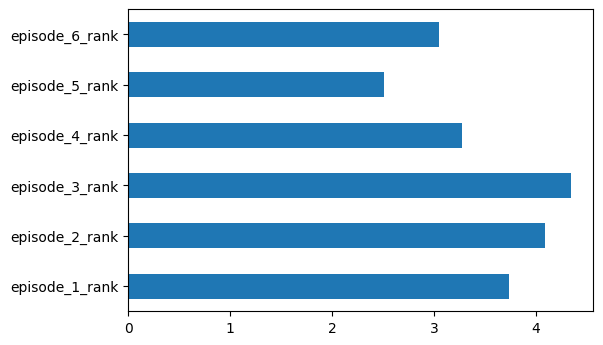

In [19]:
star_wars[star_wars.columns[9:15]].mean().plot.barh()

According to the ranking episodes 4-6 have the best rankings. These were the first 3 original star wars movies released. 
The best ranked movie is the 'Episode 5: Empire Strikes Back'. 

### Finding the Most Viewed Movie

In [20]:
star_wars[star_wars.columns[3:9]].sum()

episode_1_seen    673
episode_2_seen    571
episode_3_seen    550
episode_4_seen    607
episode_5_seen    758
episode_6_seen    738
dtype: int64

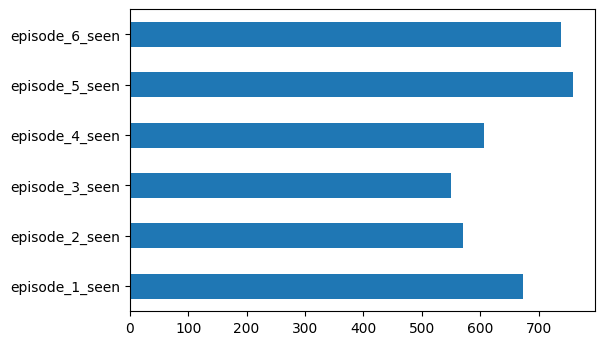

In [21]:
star_wars[star_wars.columns[3:9]].sum().plot.barh()

In [22]:
star_wars.corr()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,episode_1_seen,episode_2_seen,episode_3_seen,episode_4_seen,episode_5_seen,episode_6_seen,episode_1_rank,episode_2_rank,episode_3_rank,episode_4_rank,episode_5_rank,episode_6_rank
RespondentID,1.000000,0.085264,0.071518,0.125047,0.115280,0.096706,0.073702,0.081299,0.115950,0.012867,-0.005917,-0.079068,-0.005253,-0.028552
Have you seen any of the 6 films in the Star Wars franchise?,0.085264,1.000000,0.591944,0.497981,0.480601,0.529160,0.687772,0.663317,NaN,NaN,NaN,NaN,NaN,NaN
episode_1_seen,0.071518,0.591944,1.000000,0.783358,0.729996,0.665818,0.648044,0.653696,0.067218,0.013792,-0.067711,-0.146503,0.066301,0.079381
episode_2_seen,0.125047,0.497981,0.783358,1.000000,0.883886,0.687882,0.611608,0.642843,0.246639,0.041711,-0.102122,-0.160216,-0.014686,-0.002038
episode_3_seen,0.115280,0.480601,0.729996,0.883886,1.000000,0.698517,0.617805,0.651306,0.308085,0.134838,-0.181001,-0.147843,-0.049921,-0.053451
episode_4_seen,0.096706,0.529160,0.665818,0.687882,0.698517,1.000000,0.734259,0.759477,0.440301,0.365598,0.174842,-0.554932,-0.136834,-0.143364
episode_5_seen,0.073702,0.687772,0.648044,0.611608,0.617805,0.734259,1.000000,0.910124,0.385813,0.388224,0.248817,-0.130101,-0.422226,-0.368499
episode_6_seen,0.081299,0.663317,0.653696,0.642843,0.651306,0.759477,0.910124,1.000000,0.431521,0.391197,0.237803,-0.159497,-0.272718,-0.509609
episode_1_rank,0.115950,NaN,0.067218,0.246639,0.308085,0.440301,0.385813,0.431521,1.000000,0.415511,0.066760,-0.451862,-0.454098,-0.462642
episode_2_rank,0.012867,NaN,0.013792,0.041711,0.134838,0.365598,0.388224,0.391197,0.415511,1.000000,0.336002,-0.435664,-0.528662,-0.532254


The top 3 movies seen were Episode 5: Empire Strikes Back, Episode 6: Return of the Jedi, Episode 1: The Phantom Menace. 
The top 2 seen have a strong correlation with the top 2 ranked. Episode 1 The Phantom Menace came in fourth place within the rankings but it was number 3 with the most seen. This could be due to the fact this was the first movie of the 2nd trilogy. The 2nd trilogy did not begin until 1999. This made a 16 year hiatus from the first trilogy. With Episode 6 Return of the Jedi being released in 1983. 

### Exploring the Data by Binary Segments

In [23]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'episode_1_seen', 'episode_2_seen', 'episode_3_seen', 'episode_4_seen',
       'episode_5_seen', 'episode_6_seen', 'episode_1_rank', 'episode_2_rank',
       'episode_3_rank', 'episode_4_rank', 'episode_5_rank', 'episode_6_rank',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gen

In [24]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

Text(0.5, 1.0, 'Males that have seen any of the 6 films in the Star Wars franchise')

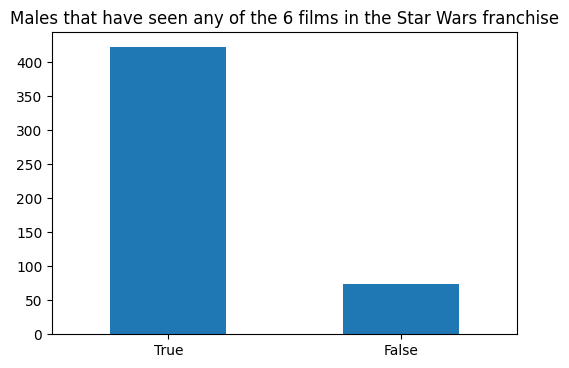

In [25]:
males['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Males that have seen any of the 6 films in the Star Wars franchise')

Text(0.5, 1.0, 'Females that have seen any of the 6 films in the Star Wars franchise')

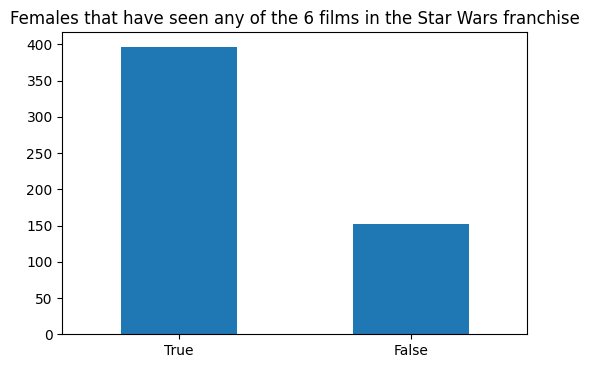

In [26]:
females['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Females that have seen any of the 6 films in the Star Wars franchise')

With the 2 graphs above we can see that more males have seen the star wars films than females. 

Text(0.5, 1.0, 'Movie seen by Males')

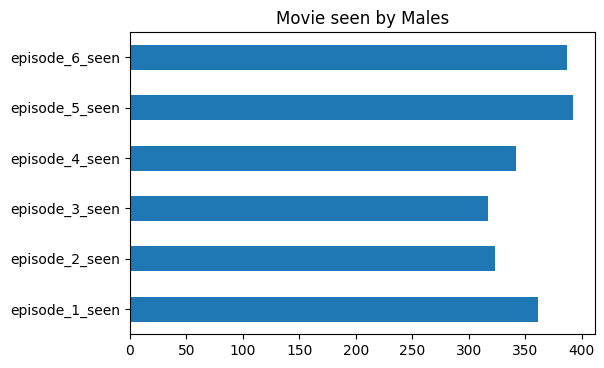

In [27]:
males[males.columns[3:9]].sum().plot.barh()
plt.title('Movie seen by Males')

Text(0.5, 1.0, 'Movie seen by Females')

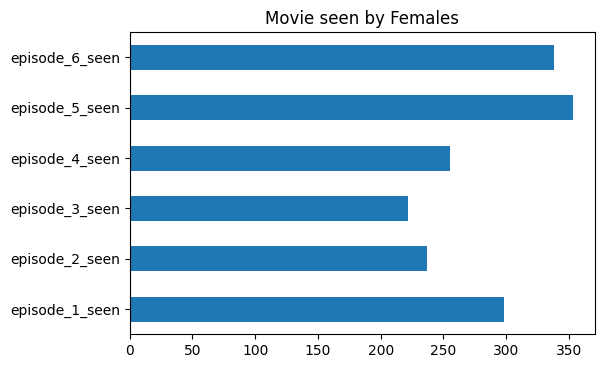

In [28]:
females[females.columns[3:9]].sum().plot.barh()
plt.title('Movie seen by Females')

Text(0.5, 1.0, 'Movie Rankings by Males')

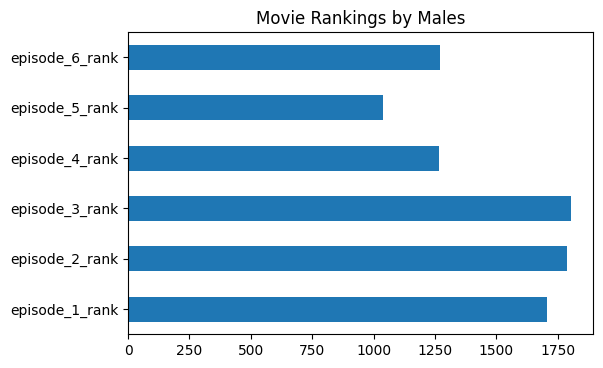

In [29]:
males[males.columns[9:15]].sum().plot.barh()
plt.title('Movie Rankings by Males')

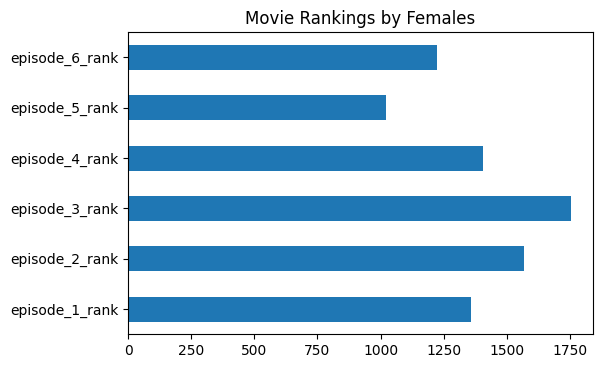

In [30]:
females[females.columns[9:15]].sum().plot.barh()
plt.title('Movie Rankings by Females')
plt.show()

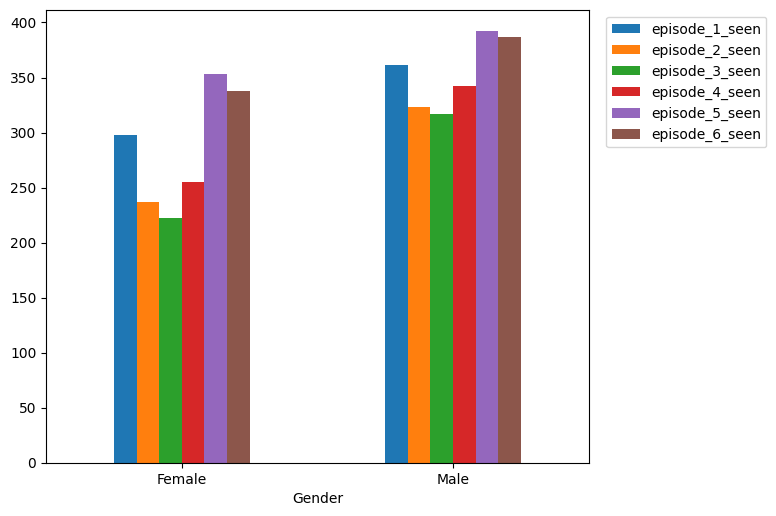

In [31]:
seen_by_gender = star_wars.groupby('Gender')[star_wars.columns[3:9]].sum()

fig, ax = plt.subplots()
seen_by_gender.plot.bar(figsize = (7,6), ax= ax)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Comparing the women to men on the graph we can see that men have seen every movie more than females. Episode 3 had the lowest viewership amongst both genders while episode 5 had the most views by both genders. We can also see both men and women have the same pattern of movies seen across the entire franchise. 

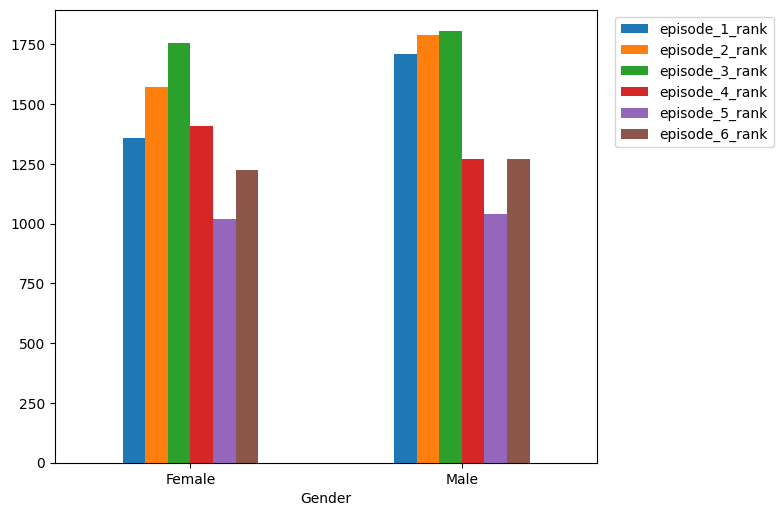

In [32]:
rank_by_gender = star_wars.groupby('Gender')[star_wars.columns[9:15]].sum()

fig, ax = plt.subplots()
rank_by_gender.plot.bar(figsize = (7,6), ax= ax)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Comparing the rankings we see that the entire franchise have similar rankings. The only difference is episode 1 rank 3rd for females and episode 6 ranks 3rd for men. 

### Survey questions by gender

In [33]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna= False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

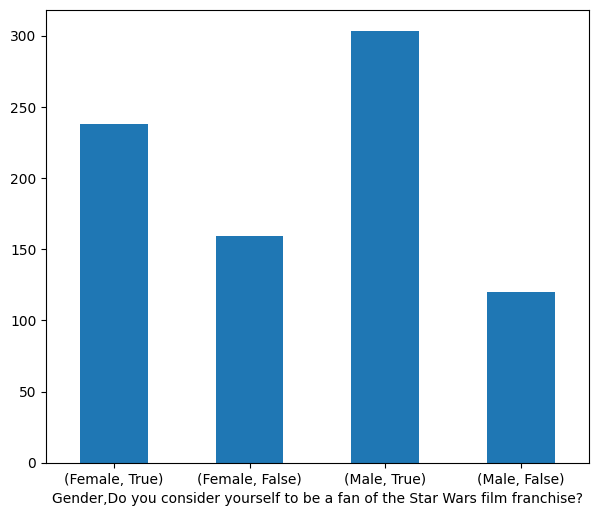

In [34]:
fan_by_gender = star_wars.groupby('Gender')['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

fig, ax = plt.subplots()
fan_by_gender.plot.bar(figsize = (7,6), ax= ax)
plt.xticks(rotation=0)
plt.show()

In [35]:
star_wars['Are you familiar with the Expanded Universe?'].value_counts(dropna= False)

No     615
NaN    358
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

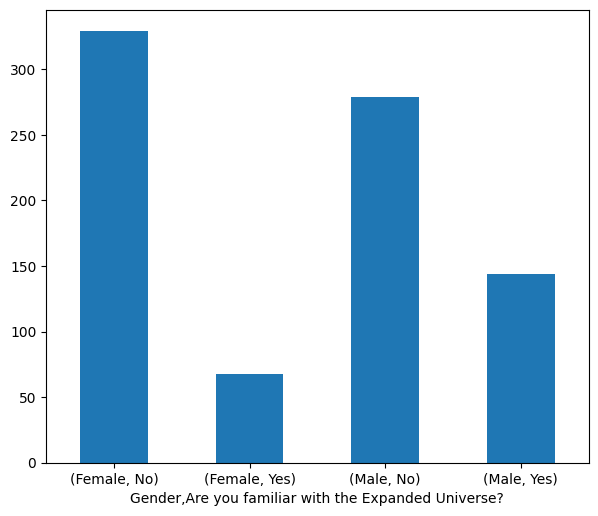

In [36]:
fam_by_gender = star_wars.groupby('Gender')['Are you familiar with the Expanded Universe?'].value_counts()

fig, ax = plt.subplots()
fam_by_gender.plot.bar(figsize = (7,6), ax= ax)
plt.xticks(rotation=0)
plt.show()

In [37]:
star_wars['Do you consider yourself to be a fan of the Expanded Universe?'].value_counts(dropna=False)

NaN    973
No     114
Yes     99
Name: Do you consider yourself to be a fan of the Expanded Universe?, dtype: int64

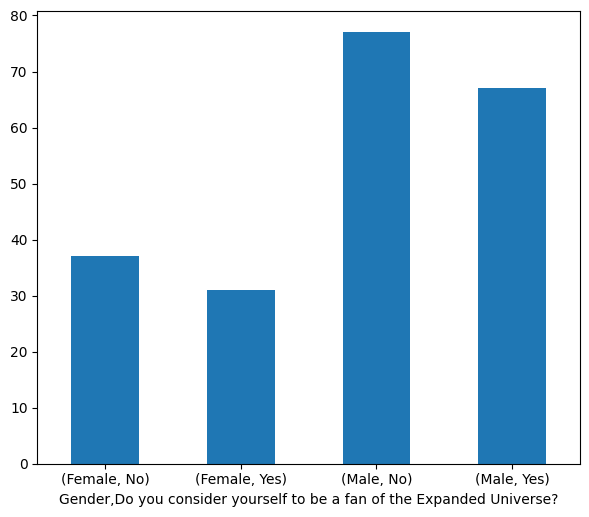

In [38]:
fanx_by_gender = star_wars.groupby('Gender')['Do you consider yourself to be a fan of the Expanded Universe?'].value_counts()

fig, ax = plt.subplots()
fanx_by_gender.plot.bar(figsize = (7,6), ax= ax)
plt.xticks(rotation=0)
plt.show()

In [39]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

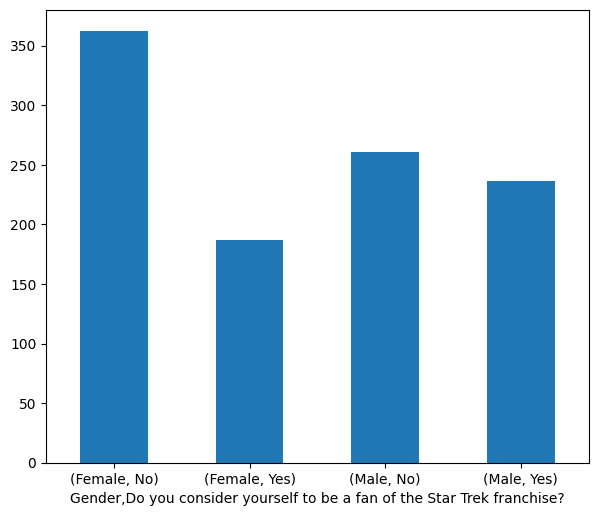

In [40]:
fant_by_gender = star_wars.groupby('Gender')['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()

fig, ax = plt.subplots()
fant_by_gender.plot.bar(figsize = (7,6), ax= ax)
plt.xticks(rotation=0)
plt.show()

According to the graphs above no matter the question the male gender answered "yes" the most compared to females. When it comes to dedicated fans of the Star Wars and Star Trek franchise it seems it mostly dominated by the male gender. 

### Exploring the Age column

In [41]:
star_wars['Age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

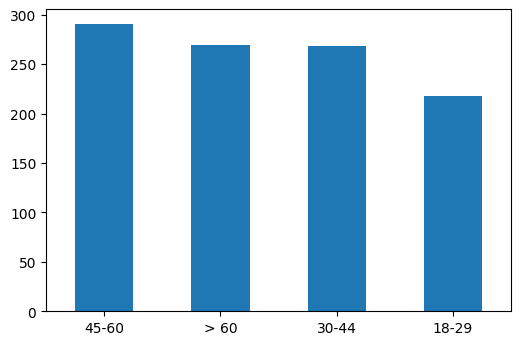

In [42]:
star_wars['Age'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

Here we can see the largest age group of respondents is 45-60. The lowest is age 18-29. Lets see how this compares with the movie rankings and movies seen. 

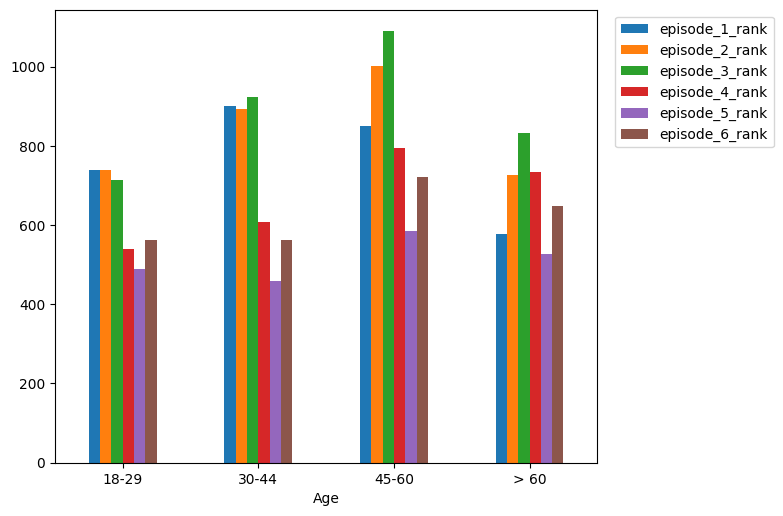

In [43]:
star_wars_age = star_wars.groupby('Age')[star_wars.columns[9:15]].sum()

star_wars_age.plot.bar(figsize=(7,6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Ages 18-60 all seem to favor the original trilogy over the new trilogy by a big portion. An interesting piece is the above 60 years old rank the movies in a different order. They dont seem to favor one trilogy over the other as much. 

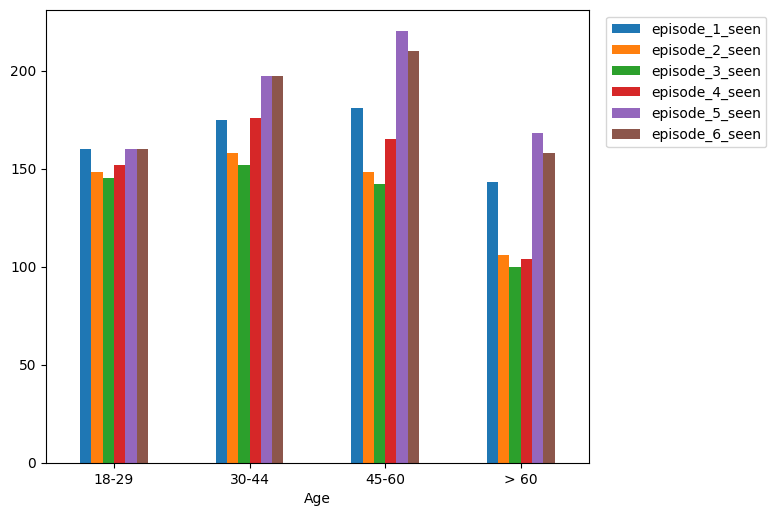

In [44]:
star_wars_age = star_wars.groupby('Age')[star_wars.columns[3:9]].sum()

star_wars_age.plot.bar(figsize=(7,6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Broken up by age group again seems to share the same pattern with ranking. Episode 5 and 6 are the most viewed by all age ranges. Episode 1 being in 3rd place which makes sense since this was the first movie of the 2nd trilogy. The anticipation and interest was probably very high on the first new movie of the trilogy. 

Overall we can say the first trilogy is more popular than the second trilogy. 

### Household income

In [45]:
star_wars['Household Income'].value_counts(dropna=False)

NaN                    328
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [46]:
star_wars.groupby('Age')['Household Income'].value_counts(dropna=False)

Age    Household Income   
18-29  NaN                    49
       $25,000 - $49,999      49
       $0 - $24,999           48
       $50,000 - $99,999      40
       $100,000 - $149,999    16
       $150,000+              16
30-44  $50,000 - $99,999      96
       $25,000 - $49,999      45
       $100,000 - $149,999    42
       NaN                    33
       $0 - $24,999           31
       $150,000+              21
45-60  $50,000 - $99,999      72
       NaN                    58
       $100,000 - $149,999    50
       $150,000+              40
       $25,000 - $49,999      40
       $0 - $24,999           31
> 60   $50,000 - $99,999      90
       $25,000 - $49,999      52
       NaN                    48
       $100,000 - $149,999    33
       $0 - $24,999           28
       $150,000+              18
Name: Household Income, dtype: int64

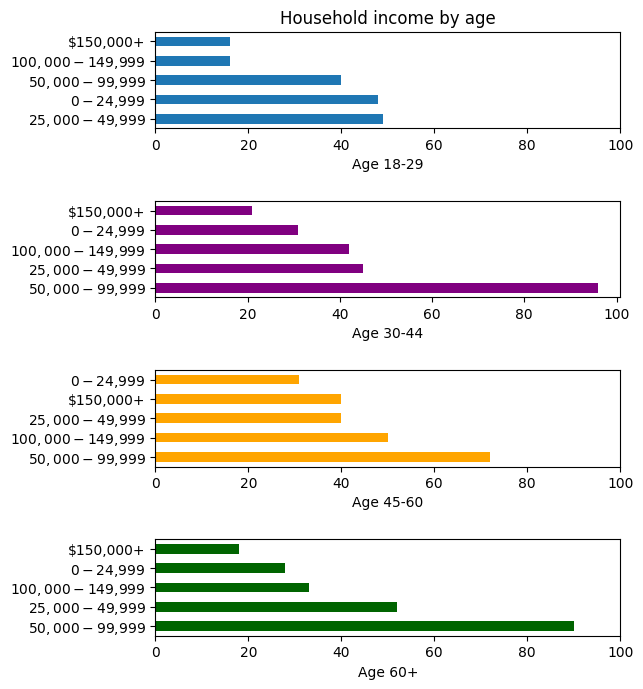

In [47]:
twenties = star_wars[star_wars['Age'] == '18-29']
twenties_income = twenties['Household Income'].value_counts()

thfo = star_wars[star_wars['Age'] == '30-44']
thfo_income = thfo['Household Income'].value_counts()

fosix = star_wars[star_wars['Age'] == '45-60']
fosix_income = fosix['Household Income'].value_counts()

sixov = star_wars[star_wars['Age'] == '> 60']
sixov_income = sixov['Household Income'].value_counts()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))
plt.subplots_adjust(hspace=.75)

twenties_income.plot.barh(ax=ax1)
ax1.set_xlabel('Age 18-29')
ax1.set_title('Household income by age')
ax1.set_xticks([0,20,40,60,80,100])

thfo_income.plot.barh(ax=ax2, color='purple')
ax2.set_xlabel('Age 30-44')

fosix_income.plot.barh(ax=ax3, color='orange')
ax3.set_xlabel('Age 45-60')
ax3.set_xticks([0,20,40,60,80,100])

sixov_income.plot.barh(ax=ax4, color='darkgreen')
ax4.set_xlabel('Age 60+')
ax4.set_xticks([0,20,40,60,80,100])
plt.show()

According to the income by age we can see the youngest group answered this question the least. 
Just by eyeballing the ungraphed data above I can tell the 18-29 answered this question the least. 
This could be the fact that they are students/unemployed. 

The biggest income range for 30+ is 50,000-99,999. 
It seems like people with an income over 150,000 are the least intrested in the star wars franchise. 

Lets see how income compares to gender. 

In [48]:
gender_income = star_wars.groupby('Household Income')['Gender'].value_counts()
print (gender_income)

Household Income     Gender
$0 - $24,999         Female     79
                     Male       59
$100,000 - $149,999  Male       79
                     Female     62
$150,000+            Male       51
                     Female     44
$25,000 - $49,999    Female     97
                     Male       89
$50,000 - $99,999    Female    161
                     Male      137
Name: Gender, dtype: int64


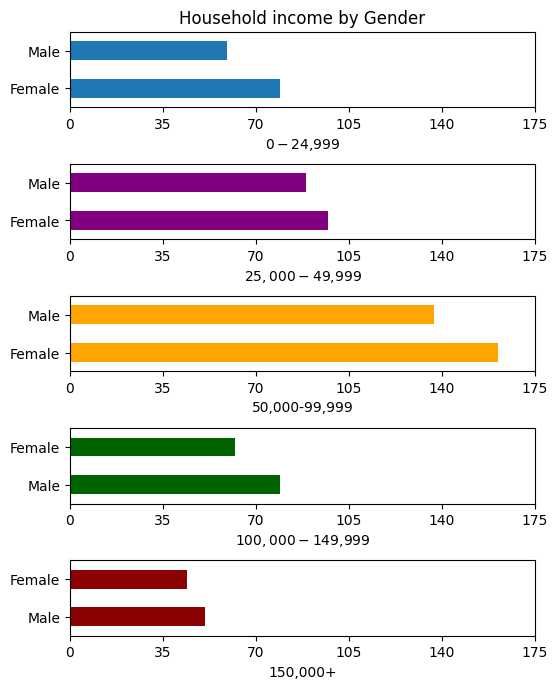

In [49]:
low_income = star_wars[star_wars['Household Income'] == '$0 - $24,999']
low_income_gender = low_income['Gender'].value_counts()

lowmid_income = star_wars[star_wars['Household Income'] == '$25,000 - $49,999']
lowmid_income_gender = lowmid_income['Gender'].value_counts()

mid_income = star_wars[star_wars['Household Income'] == '$50,000 - $99,999']
mid_income_gender = mid_income['Gender'].value_counts()

midhigh_income = star_wars[star_wars['Household Income'] == '$100,000 - $149,999']
midhigh_income_gender = midhigh_income['Gender'].value_counts()

high_income = star_wars[star_wars['Household Income'] == '$150,000+']
high_income_gender = high_income['Gender'].value_counts()



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(6,8))
plt.subplots_adjust(hspace=.75)

low_income_gender.plot.barh(ax=ax1)
ax1.set_title('Household income by Gender')
ax1.set_xlabel('$0 - $24,999')
ax1.set_xticks([0,35,70,105,140,175])

lowmid_income_gender.plot.barh(ax=ax2, color='purple')
ax2.set_xlabel('$25,000 - $49,999')
ax2.set_xticks([0,35,70,105,140,175])

mid_income_gender.plot.barh(ax=ax3, color='orange')
ax3.set_xlabel('50,000-99,999')
ax3.set_xticks([0,35,70,105,140,175])

midhigh_income_gender.plot.barh(ax=ax4, color='darkgreen')
ax4.set_xlabel('$100,000 - $149,999')
ax4.set_xticks([0,35,70,105,140,175])

high_income_gender.plot.barh(ax=ax5, color='darkred')
ax5.set_xlabel('150,000+')
ax5.set_xticks([0,35,70,105,140,175])

plt.show()


In [50]:
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

Income vs gender for star wars movie goers show that Females dominate income levels below 100,000. Over 100,000 appears to correlate more with men. We dont have an even ratio of women to men either. According to the gender column. 549 Females completed the survey and 497 males. 

### Education: 

Lets look at education of the survey respondents. 

In [51]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

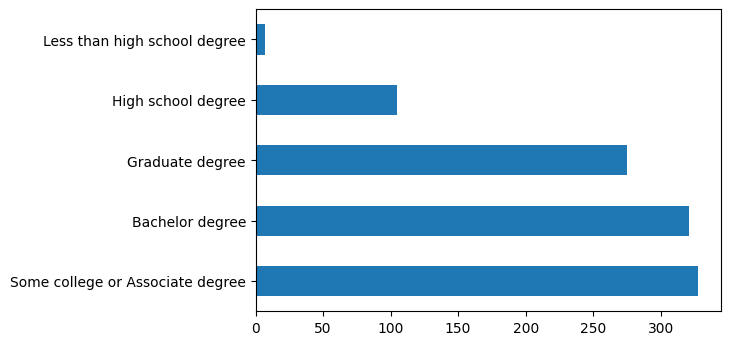

In [52]:
star_wars['Education'].value_counts().plot.barh()

This graph shows that most star wars survey respondents have education above a high school degree. This can be skewed by age since most respondents were a higher age group. 

### Cleaning and viewing the favorability of characters

In [53]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'episode_1_seen', 'episode_2_seen', 'episode_3_seen', 'episode_4_seen',
       'episode_5_seen', 'episode_6_seen', 'episode_1_rank', 'episode_2_rank',
       'episode_3_rank', 'episode_4_rank', 'episode_5_rank', 'episode_6_rank',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gen

In [54]:
star_wars['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

The 14 characters in order are: 

1) Han Solo	
2) Luke Skywalker	
3) Princess Leia Organa	
4) Anakin Skywalker	
5) Obi Wan Kenobi	
6) Emperor Palpatine	
7) Darth Vader	
8) Lando Calrissian	
9) Boba Fett	
10) C-3P0	
11) R2 D2	
12) Jar Jar Binks	
13) Padme Amidala	
14) Yoda

I will rename the column names. 

In [55]:
star_wars = star_wars.rename(columns= {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han_Solo_favorability',
                                       'Unnamed: 16':'Luke_Skywalker_favorability', 
                                       'Unnamed: 17':'Princess_Leia_favorability', 
                                       'Unnamed: 18':'Anakin_Skywalker_favorability',
                                       'Unnamed: 19':'Obi_Wan_Kenobi_favorability',
                                       'Unnamed: 20':'Emperor_Palpatine_favorability',
                                       'Unnamed: 21':'Darth_Vader_favorability',
                                       'Unnamed: 22':'Lando_Calrissian_favorability',
                                       'Unnamed: 23':'Boba_Fett_favorability',
                                       'Unnamed: 24':'C-3P0_favorability',
                                       'Unnamed: 25':'R2_D2_favorability',
                                       'Unnamed: 26':'Jar_Jar_Binks_favorability',
                                       'Unnamed: 27':'Padme_Amidala_favorability',
                                       'Unnamed: 28':'Yoda_favorability'})

star_wars.columns[15:29]

Index(['Han_Solo_favorability', 'Luke_Skywalker_favorability',
       'Princess_Leia_favorability', 'Anakin_Skywalker_favorability',
       'Obi_Wan_Kenobi_favorability', 'Emperor_Palpatine_favorability',
       'Darth_Vader_favorability', 'Lando_Calrissian_favorability',
       'Boba_Fett_favorability', 'C-3P0_favorability', 'R2_D2_favorability',
       'Jar_Jar_Binks_favorability', 'Padme_Amidala_favorability',
       'Yoda_favorability'],
      dtype='object')

In [56]:
swstr = star_wars.iloc[:,15:29]

In [57]:
swstr['Han_Solo_favorability'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han_Solo_favorability, dtype: int64

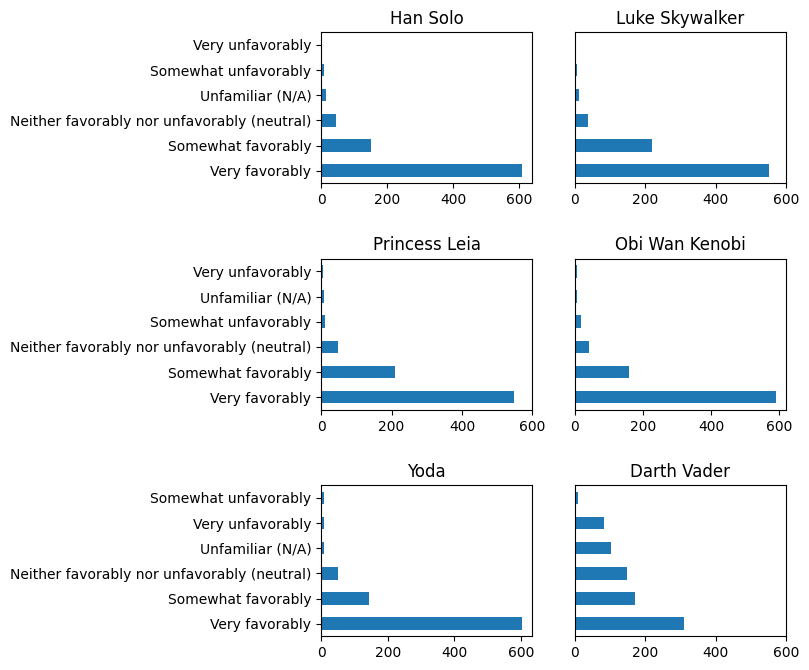

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6,8))
ax1, ax2, ax3, ax4,ax5,ax6 = axes.flatten()
plt.subplots_adjust(hspace=.50)


swstr['Han_Solo_favorability'].value_counts(dropna=True).plot.barh(ax=ax1)
ax1.set_title('Han Solo')
swstr['Luke_Skywalker_favorability'].value_counts(dropna=True).plot.barh(ax=ax2)
ax2.set_yticks([])
ax2.set_title('Luke Skywalker')
ax2.set_xticks([0,200,400,600])
swstr['Princess_Leia_favorability'].value_counts(dropna=True).plot.barh(ax=ax3)
ax3.set_xticks([0,200,400,600])
ax3.set_title('Princess Leia')
swstr['Obi_Wan_Kenobi_favorability'].value_counts(dropna=True).plot.barh(ax=ax4)
ax4.set_yticks([])
ax4.set_title('Obi Wan Kenobi')
ax4.set_xticks([0,200,400,600])
swstr['Yoda_favorability'].value_counts(dropna=True).plot.barh(ax=ax5)
ax5.set_xticks([0,200,400,600])
ax5.set_title('Yoda')
swstr['Darth_Vader_favorability'].value_counts(dropna=True).plot.barh(ax=ax6)
ax6.set_yticks([])
ax6.set_title('Darth Vader')
ax6.set_xticks([0,200,400,600])

plt.show()

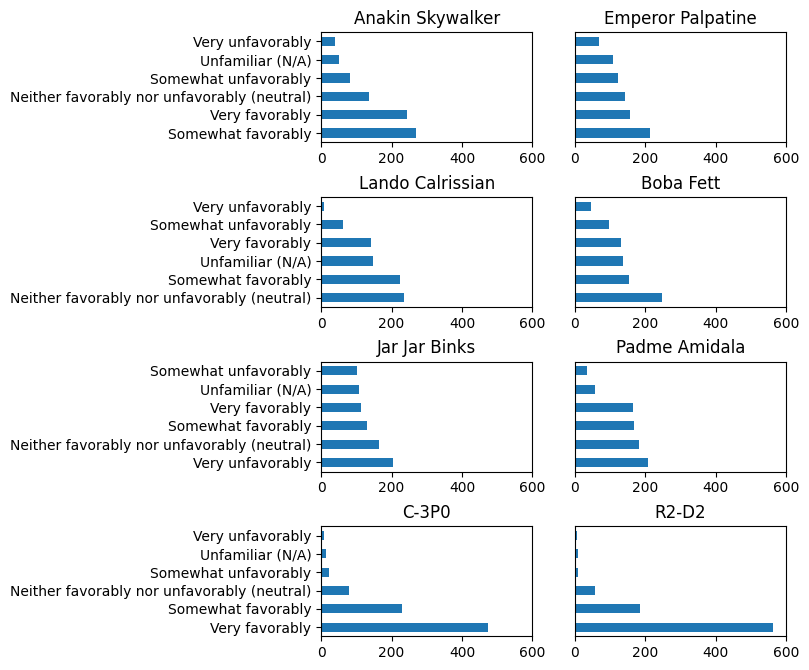

In [59]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6,8))
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8 = axes.flatten()
plt.subplots_adjust(hspace=.50)


swstr['Anakin_Skywalker_favorability'].value_counts(dropna=True).plot.barh(ax=ax1)
ax1.set_title('Anakin Skywalker')
ax1.set_xticks([0,200,400,600])
swstr['Emperor_Palpatine_favorability'].value_counts(dropna=True).plot.barh(ax=ax2)
ax2.set_yticks([])
ax2.set_title('Emperor Palpatine')
ax2.set_xticks([0,200,400,600])
swstr['Lando_Calrissian_favorability'].value_counts(dropna=True).plot.barh(ax=ax3)
ax3.set_xticks([0,200,400,600])
ax3.set_title('Lando Calrissian')
swstr['Boba_Fett_favorability'].value_counts(dropna=True).plot.barh(ax=ax4)
ax4.set_yticks([])
ax4.set_title('Boba Fett')
ax4.set_xticks([0,200,400,600])
swstr['Jar_Jar_Binks_favorability'].value_counts(dropna=True).plot.barh(ax=ax5)
ax5.set_xticks([0,200,400,600])
ax5.set_title('Jar Jar Binks')
swstr['Padme_Amidala_favorability'].value_counts(dropna=True).plot.barh(ax=ax6)
ax6.set_yticks([])
ax6.set_title('Padme Amidala')
ax6.set_xticks([0,200,400,600])
swstr['C-3P0_favorability'].value_counts(dropna=True).plot.barh(ax=ax7)
ax7.set_xticks([0,200,400,600])
ax7.set_title('C-3P0')
swstr['R2_D2_favorability'].value_counts(dropna=True).plot.barh(ax=ax8)
ax8.set_yticks([])
ax8.set_title('R2-D2')
ax8.set_xticks([0,200,400,600])
plt.show()



As we can see the favorability of the characters from the 2nd trilogy is much lower than the first trilogy. 
The 1st trilogy released has higher favorable ratings then any character in the 2nd trilogy. No matter if the character is a hero or villian. 

### In Conclusion: 

The male gender are bigger fans of the Star Wars franchise and Star Trek franchise. The males have also seen more of the movies than their female counterparts. More females completed the survey than males. 

The majority of fans have an education level of some college or higher. Which correlates with the age of the survey correspodents. The majority of survey correspondents were over the age of 30. 

Regarding the household income the majority of survey respondents were in the range of 50,000-99,999.

From all the data that has been analyzed I can safely say the 1st trilogy/original 3 movies were the most popular and most liked trilogy amongst the two. 
